# Range Queries

## Sparse Table

![WhatsApp Image 2025-06-10 at 12.34.49_a34e7f19.jpg](<attachment:WhatsApp Image 2025-06-10 at 12.34.49_a34e7f19.jpg>)
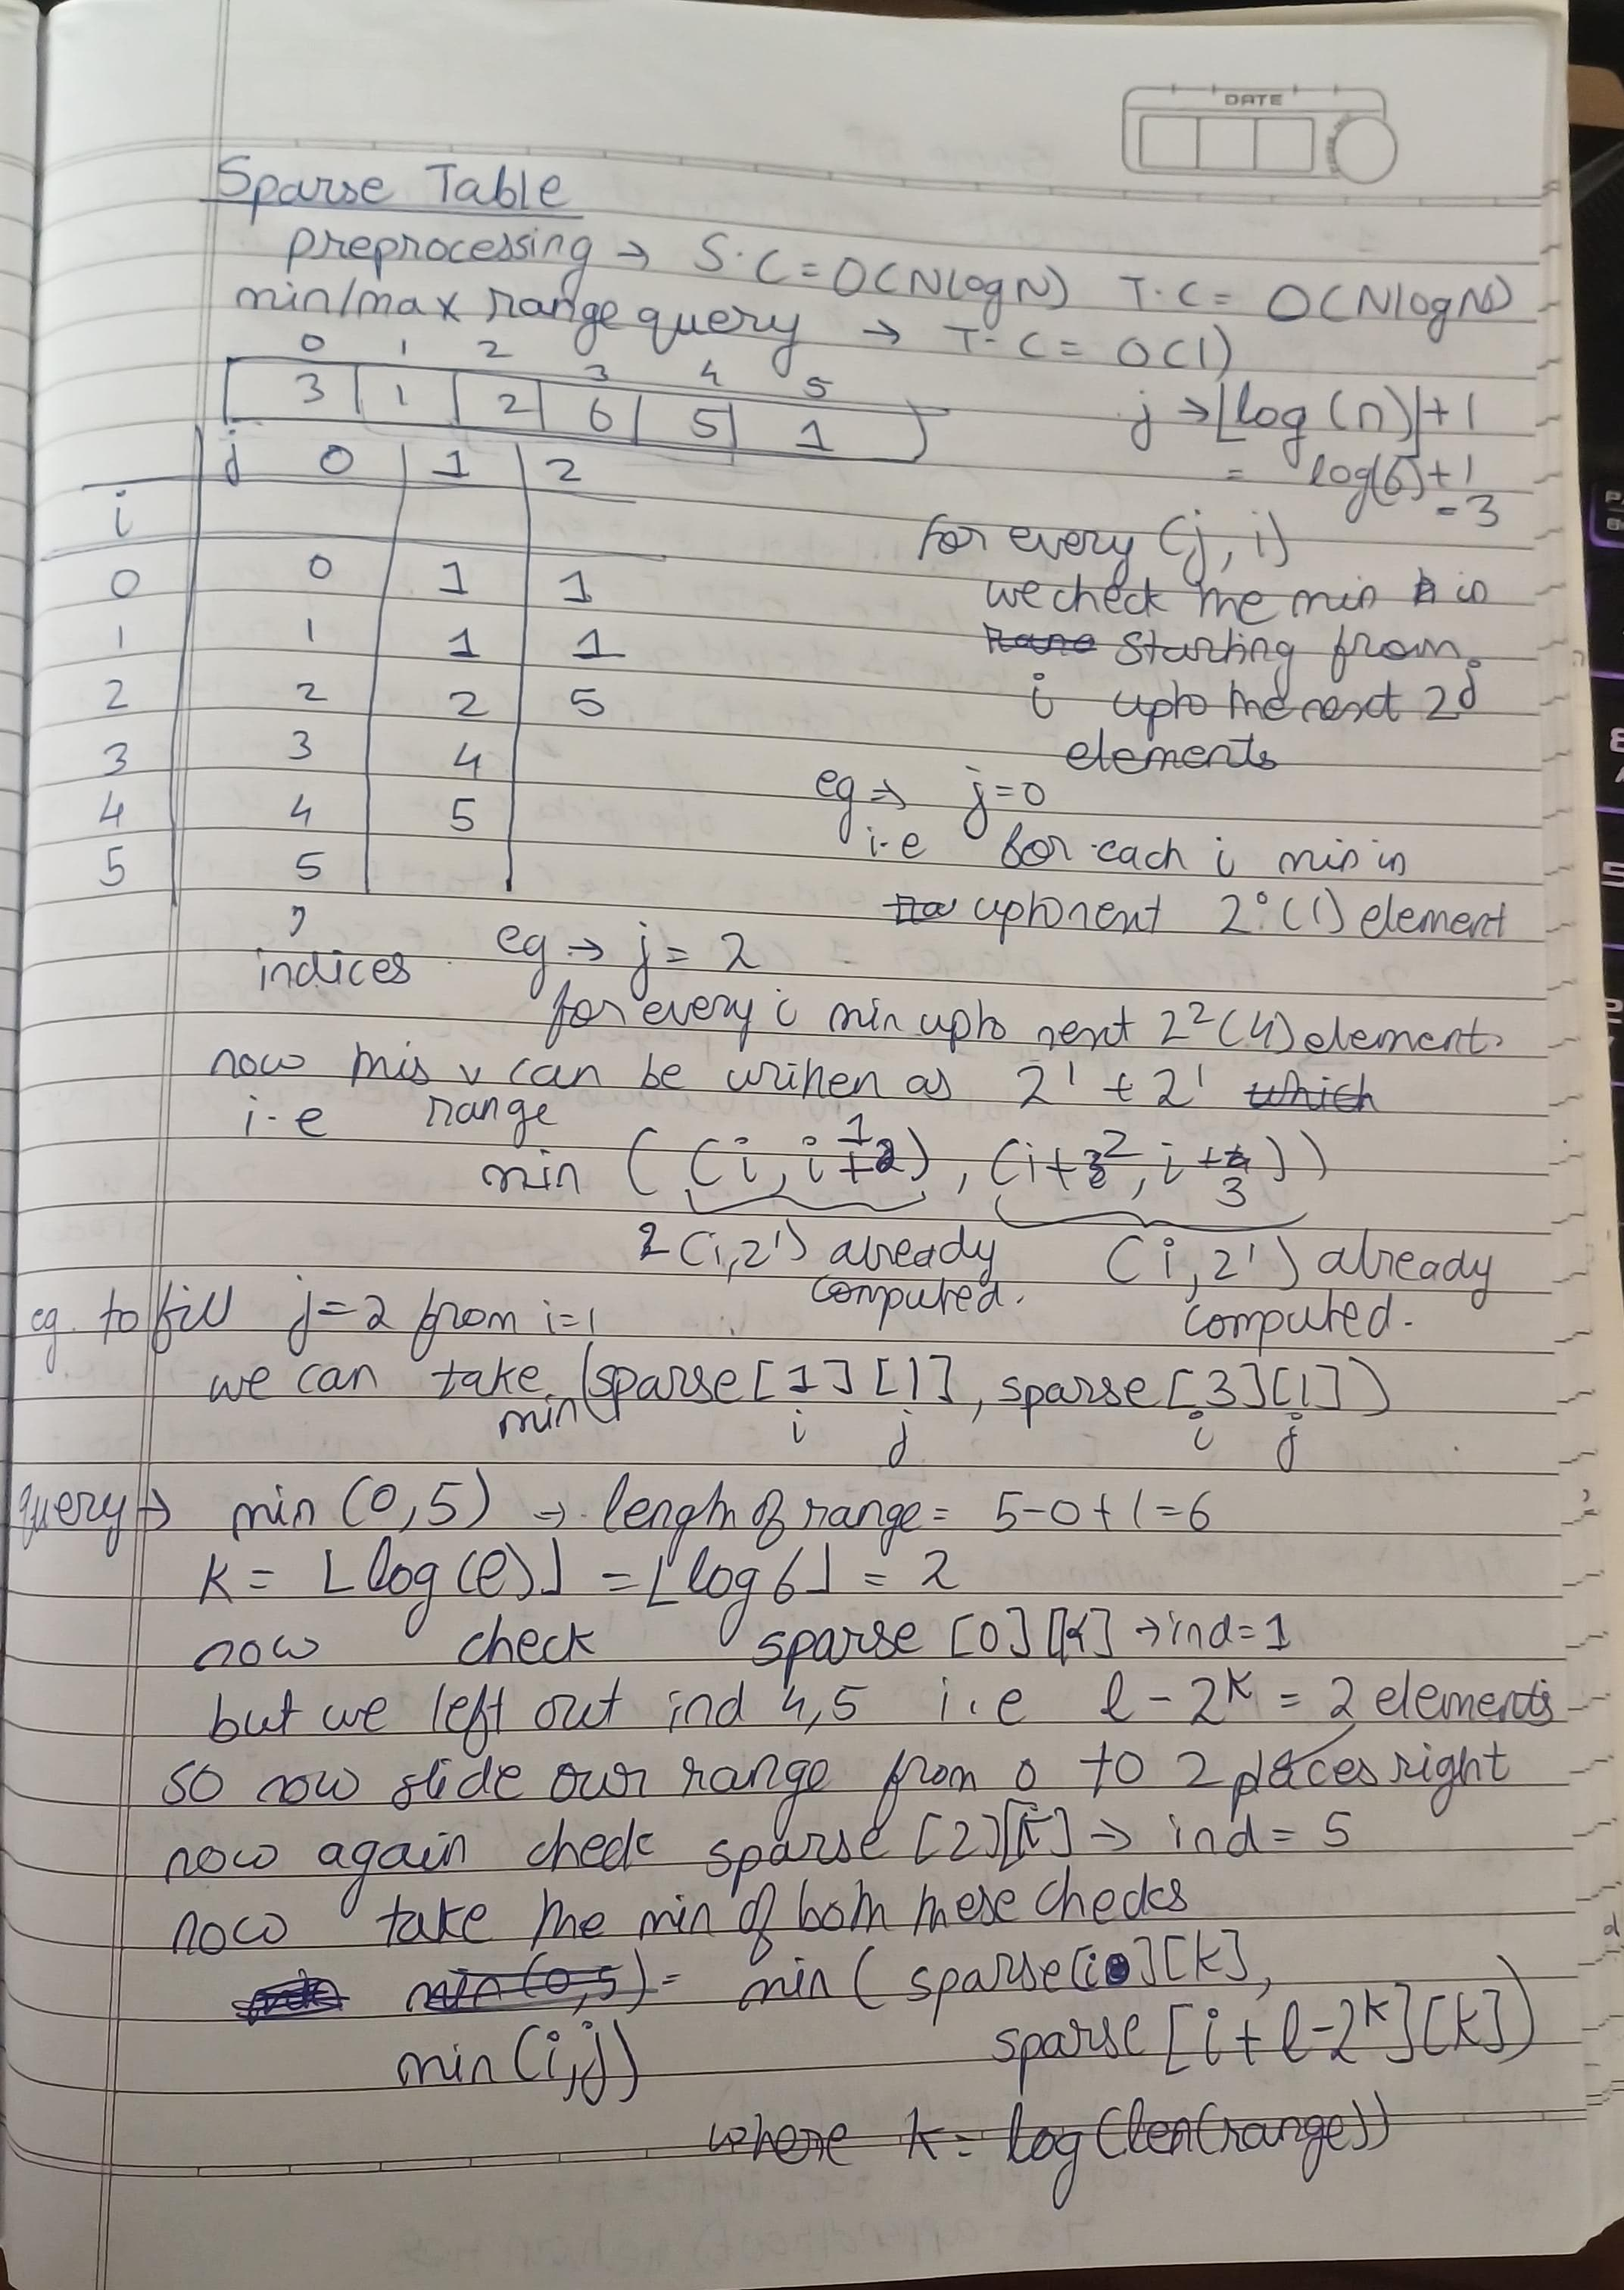

In [ ]:
# Sparse Tables for Range Minimum Query (RMQ)
# Preprocessing time: O(n log n) space: O(n log n)
# Query time: O(1)

import math
class SparseTable:
    def __init__(self, arr):
        self.n = len(arr)
        max_log = math.ceil(math.log2(self.n)) + 1
        self.sparse = [[0] * max_log for _ in range(self.n)]
        self.sparse2 = [[0] * max_log for _ in range(self.n)]
        self.build(arr)

    def build(self, arr):
        for i in range(self.n):
            self.sparse[i][0] = arr[i]
            self.sparse2[i][0] = arr[i]
        for j in range(1, math.ceil(math.log2(self.n)) + 1):
            for i in range(self.n - (1 << j) + 1):
                self.sparse[i][j] = min(self.sparse[i][j-1], self.sparse[i + (1 << (j-1))][j-1])
                self.sparse2[i][j] = max(self.sparse2[i][j-1], self.sparse2[i + (1 << (j-1))][j-1])

    def query(self, l, r):
        length = r - l + 1
        k = int(math.log2(length))
        mini = min(self.sparse[l][k], self.sparse[r - (1 << k) + 1][k])
        maxi = max(self.sparse2[l][k], self.sparse2[r - (1 << k) + 1][k])
        return maxi, mini

# Return both maximum and minimum in the range [l, r]
# Example usage
if __name__ == "__main__":
    arr = [1, 3, 2, 7, 9, 11]
    st = SparseTable(arr)
    print(st.query(1, 4))  # Output: 9,2 (maximum and minimum in range [3, 2, 7, 9])
    print(st.query(0, 5))  


(9, 2)
(11, 1)


## Fenwick Tree

- To get the rightmost set bit:- x & (-x)
- To remove the rightmost set bit:- x - (x & (-x))
- To add the righmost set bit:- x + (x & (-x))

In [ ]:
# Fenwick Tree (Binary Indexed Tree) for Range Sum Query
# Preprocessing time: O(nlogn) space: O(n)
# Query time: O(log n)

class FenwickTree:
    
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (self.n + 1)
        for i in range(self.n):
            self.update(i + 1,arr[i] )

    def update(self, index, delta):
        while index <= self.n:
            self.tree[index] += delta
            index += index & -index

    def query(self, index):
        result = 0
        while index > 0:
            result += self.tree[index]
            index -= index & -index
        return result

    def range_query(self, left, right):
        return self.query(right) - self.query(left - 1)


arr = [3, 2, -1, 6, 5, 4, -3, 3, 7, 2, 3]

# NOTE : Fenwick Tree uses 1-based indexing internally, so we need to adjust the indices accordingly.
# Initialize the tree from the array
bit = FenwickTree(arr)

# Query the sum of first 5 elements: 3 + 2 + (-1) + 6 + 5 = 15
print("Sum of first 5 elements:", bit.query(5))  # Output: 15

# Query the sum from index 3 to 7: -1 + 6 + 5 + 4 + (-3) = 11
print("Sum from index 3 to 7:", bit.range_query(3, 7))  # Output: 11

# Update: add 2 to index 4 (current value is 6 -> becomes 8)
bit.update(4, 2)

# Now query again after the update
print("Sum of first 5 elements after update:", bit.query(5))  # Output: 17

Sum of first 5 elements: 15
Sum from index 3 to 7: 11
Sum of first 5 elements after update: 17


In [ ]:
# Range sum queries mutable

class FenwickTree:

    def __init__(self,arr):
        self.n=len(arr)
        self.bit=[0]*(self.n+1)
        for i in range(self.n):
            self.update(i+1,arr[i])
    
    def update(self,ind,x):
        while ind<=self.n:
            self.bit[ind]+=x
            ind+=(ind & -ind)
    
    def query(self,ind):
        res=0
        while ind>0:
            res+=self.bit[ind]
            ind-=(ind & -ind)
        return res
    
    def range_query(self,l,r):
        return self.query(r)-self.query(l-1)

class NumArray:

    def __init__(self, nums):
        self.nums=nums
        self.ft=FenwickTree(nums)

    def update(self, index: int, val: int) -> None:
        self.ft.update(index+1,val-self.nums[index])
        self.nums[index]=val

    def sumRange(self, l: int, r: int) -> int:
        return self.ft.range_query(l+1,r+1)



# NOTE: the numarray originally uses 0-based indexing, but Fenwick Tree uses 1-based indexing internally. so we add one to indexes when calling the Fenwick Tree methods.

# Your NumArray object will be instantiated and called as such:
# obj = NumArray(nums)
# obj.update(index,val)
# param_2 = obj.sumRange(left,right)

Follow this for Count no. of Inversions:-> [Youtube Link](https://youtu.be/NOykDuH1_OY?si=6ziB9rquxOXvej1G)

In [ ]:
# Count inversions in an array using Fenwick Tree
# Inversion count is the number of pairs (i, j) such that i < j and arr[i] > arr[j].

# consider the number itself as the index in the Fenwick Tree.
# if number is present, we update the count of its occurence.
# then for any given no. inversions = sum(max)-sum(num) as it returns the count of numbers greater than the given number.
# as we are processng the array simultaneously, while counting inversions only the elements to left of no. have been updated, so only those will be counted, which is the case for inversions i<j.


class FenwickTree:
    
    def __init__(self):
        self.max_size=10**4
        self.bit=[0]*(self.max_size+1)
    
    def update(self,i,x):
        while i<=self.max_size:
            self.bit[i]+=x
            i+=(i & -i)
    
    def query(self,i):
        res=0
        while i>0:
            res+=self.bit[i]
            i-=(i & -i)
        return res
    
    def inversion(self,i):
        return self.query(self.max_size)-self.query(i)
        

class Solution:
    def inversionCount(self, arr):
        n=len(arr)
        # inversions for any number 
        # is sum(max)-sum(num) as the bit array is storing the cnt of occurence of each number
        cnt=0
        ft=FenwickTree()
        for num in arr:
            cnt+=ft.inversion(num)
            ft.update(num,1)
        return cnt

In [ ]:
# Reversed Pairs Leetcode 493

from typing import List

class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.bit = [0] * (size + 2)  # safer size

    def update(self, ind, x):
        while ind <= self.size:
            self.bit[ind] += x
            ind += ind & -ind

    def query(self, ind):
        res = 0
        while ind > 0:
            res += self.bit[ind]
            ind -= ind & -ind
        return res

class Solution:
    def reversePairs(self, nums: List[int]) -> int:
        all_vals = []
        for x in nums:
            all_vals.append(x)
            all_vals.append(2 * x)

        all_vals = sorted(set(all_vals))
        n = len(all_vals)
        ft = FenwickTree(n)

        def get_index(x):
            # Manual binary search for 1-based index
            low, high = 0, n - 1
            while low <= high:
                mid = (low + high) // 2
                if all_vals[mid] == x:
                    return mid + 1
                elif all_vals[mid] < x:
                    low = mid + 1
                else:
                    high = mid - 1
            return low + 1  # Position to insert if not found

        res = 0
        for x in nums:
            res += ft.query(n) - ft.query(get_index(2 * x))
            ft.update(get_index(x), 1)

        return res